# Initial exploratory data analysis

## 1. Imports and configuration

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import DATA_FILES

# Set plotting style
sns.set_theme(style="whitegrid")
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load data

In [10]:
# Load training and test datasets
train_path = DATA_FILES["train_raw"]
test_path = DATA_FILES["test_raw"]

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Normalize column names
train_df.columns = train_df.columns.str.strip().str.lower()
test_df.columns = test_df.columns.str.strip().str.lower()



## 3. Basic info

In [12]:
# Train set info
print("Training Set Info")
display(train_df.info())
display(train_df.head())

# Test set info
print("Test Set Info")
display(test_df.info())
display(test_df.head())


Training Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  10240 non-null  object
 1   label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


None

,statement,label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


Test Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  2551 non-null   object
 1   label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB


None

,statement,label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


## 4. Data shape


In [4]:
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (10240, 2)
Test set shape: (2551, 2)


## 5. Missing values


In [5]:
print("Missing values (Train):")
display(train_df.isnull().sum())

print("\nMissing values (Test):")
display(test_df.isnull().sum())


Missing values (Train):


statement    0
label        0
dtype: int64


Missing values (Test):


statement    0
label        0
dtype: int64

## 6. Target column distribution


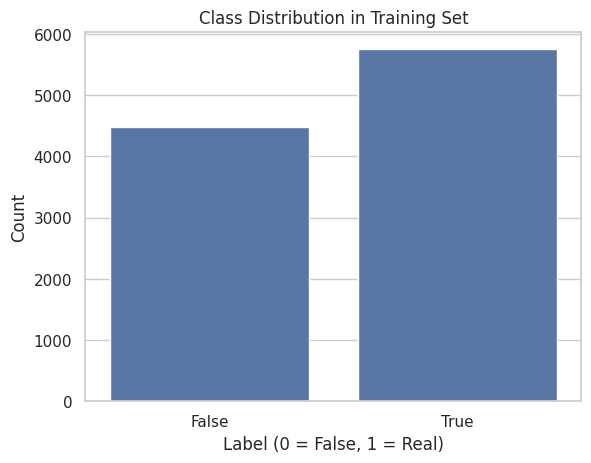

label
True     0.561719
False    0.438281
Name: proportion, dtype: float64


In [13]:
# Plot class balance
sns.countplot(x="label", data=train_df)
plt.title("Class Distribution in Training Set")
plt.xlabel("Label (0 = False, 1 = Real)")
plt.ylabel("Count")
plt.show()

print(train_df["label"].value_counts(normalize=True))


## 7. Text length distribution

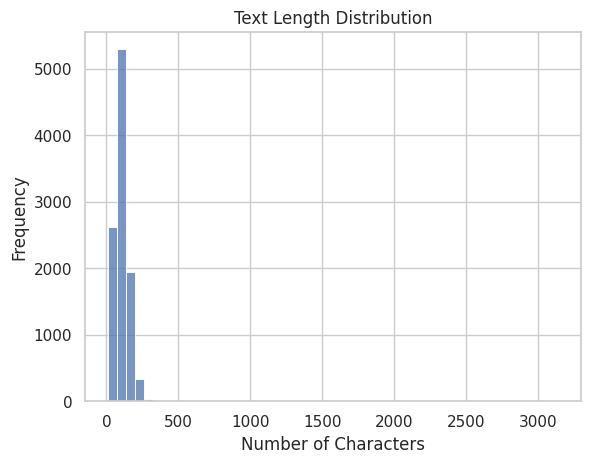

count    10240.000000
mean       106.908398
std         59.522814
min         11.000000
25%         73.000000
50%         99.000000
75%        132.250000
max       3145.000000
Name: text_length, dtype: float64

In [14]:
# Text length analysis
train_df["text_length"] = train_df["statement"].astype(str).apply(len)

sns.histplot(train_df["text_length"], bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

train_df["text_length"].describe()


## 8. Sample examples

In [16]:
print("Example Real News")
display(train_df[train_df["label"] == 1][["statement"]].head(2))

print("Example Fake News")
display(train_df[train_df["label"] == 0][["statement"]].head(2))


Example Real News


,statement
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."


Example Fake News


,statement
0,Says the Annies List political group supports ...
3,Health care reform legislation is likely to ma...
